# <font face="Verdana" color="DarkSalmon"><b>Titanic Survival</b></font>

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv("Data/train.csv")
test_df = pd.read_csv("Data/test.csv")

In [3]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q


In [4]:
train_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [5]:
mis_percent = (train_df.isnull().sum() * 100 / len(train_df)).sort_values(ascending=False)
mis_percent

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [6]:
total = train_df.isnull().sum().sort_values(ascending=False)
mis_percent = (train_df.isnull().sum() * 100 / len(train_df)).sort_values(ascending=False)
mis_percent_table = pd.concat([total, mis_percent], axis=1, keys=['total_missing_values', 'percentage'])
mis_percent_table

,total_missing_values,percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## <font color = 'DarkSalmon'><b>Data Preprocessing</b></font>

We have to fill the missing the values in both train and test data, also scaling and encoding should be done on both. We dont have to do anything with the target column. So Here, i am concatenating train and test data to make the work easier. 

In [8]:
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

Pushing the target column at the last, so we can peacefully work on the features.

In [9]:
df = df[[col for col in df.columns if col != 'Survived'] + ['Survived']]

In [10]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN


In [11]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,891.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.383838
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.486592
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [13]:
df['Embarked'].value_counts(ascending=False)

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

S  is most frequently occurred, so we will fill the 2 missing values of Embarked columns with 'S'

In [14]:
# Filling the values of AGE and Embarked 
values = {'Embarked':'S', 'Fare':df['Fare'].mean(numeric_only = True)}
df = df.fillna(value=values)

In [15]:
# To maintain the consistency we will fill the missing values of age with random values between mean and standard deviation

# Calculating the mean and standard deviation of the Age column
train_mean = train_df['Age'].mean()
train_std = train_df['Age'].std()

# Finding the number of missing values in the Age column
null_count = df['Age'].isnull().sum()

# Generating random values between mean and standard deviation
rand_age = np.random.randint(train_mean - train_std, train_mean + train_std, size=null_count)

# Creating a copy of the Age column
age_slice = df['Age'].copy()

# Filling the missing values with the random values
age_slice[np.isnan(age_slice)] = rand_age # wherever the value is nan, replace it with the random value

# At the end, the Age column will be replaced with the new column
df['Age'] = age_slice

In [16]:
rand_age

array([42, 32, 16, 42, 26, 24, 27, 26, 43, 26, 26, 28, 17, 37, 40, 36, 40,
       38, 34, 20, 32, 32, 33, 38, 39, 35, 23, 37, 40, 15, 32, 41, 25, 24,
       36, 35, 35, 22, 25, 40, 34, 37, 15, 17, 38, 36, 30, 35, 21, 30, 40,
       17, 41, 29, 38, 30, 24, 26, 39, 36, 21, 25, 32, 20, 43, 27, 34, 19,
       35, 42, 27, 28, 38, 25, 42, 19, 24, 32, 34, 29, 40, 15, 29, 32, 42,
       25, 43, 40, 30, 25, 38, 25, 36, 27, 39, 17, 33, 34, 22, 34, 28, 36,
       32, 38, 29, 16, 16, 17, 35, 30, 22, 38, 24, 25, 19, 39, 42, 16, 35,
       43, 16, 22, 36, 28, 43, 20, 26, 34, 41, 21, 36, 32, 24, 18, 26, 19,
       19, 39, 20, 26, 27, 37, 37, 23, 17, 16, 27, 15, 24, 40, 17, 35, 41,
       19, 17, 28, 30, 40, 42, 35, 39, 15, 38, 15, 40, 19, 25, 17, 40, 26,
       37, 41, 20, 39, 21, 25, 30, 31, 20, 20, 27, 21, 17, 29, 42, 39, 34,
       31, 29, 19, 26, 29, 25, 31, 24, 34, 36, 21, 36, 43, 30, 26, 34, 20,
       21, 37, 29, 29, 19, 37, 38, 16, 27, 25, 26, 32, 27, 40, 42, 18, 31,
       43, 37, 24, 35, 16

In [17]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,43.0,0,0,A.5. 3236,8.0500,NaN,S,NaN
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
1307,1308,3,"Ware, Mr. Frederick",male,40.0,0,0,359309,8.0500,NaN,S,NaN


In [18]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   int32  
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   int32  
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(1), int32(2), int64(4), object(5)
memory usage: 112.6+ KB


In [20]:
df['Cabin'].value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

You can see in the dataset that cabin is assigned to only those people for whom the fare is high, means Cabin is assigned to high class people. And the rest of the people were together (not in any cabin).

So thats why we cant fill the missing values of the cabin column, either we should drop because there is no such data which help us in prediction.

In [21]:
# Here the sibsb and parch are the number of siblings and parents on board
# Adding a new column Family size

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # 1 for self

In [22]:
df.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,FamilySize
63,64,3,"Skoog, Master. Harald",male,4,3,2,347088,27,NaN,S,0.0,6
1151,1152,3,"de Messemaeker, Mr. Guillaume Joseph",male,36,1,0,345572,17,NaN,S,NaN,2
1243,1244,2,"Dibden, Mr. William",male,18,0,0,S.O.C. 14879,73,NaN,S,NaN,1
1222,1223,1,"Dulles, Mr. William Crothers",male,39,0,0,PC 17580,29,A18,C,NaN,1
522,523,3,"Lahoud, Mr. Sarkis",male,16,0,0,2624,7,NaN,C,0.0,1
1285,1286,3,"Kink-Heilmann, Mr. Anton",male,29,3,1,315153,22,NaN,S,NaN,5
15,16,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16,NaN,S,1.0,1
751,752,3,"Moor, Master. Meier",male,6,0,1,392096,12,E121,S,1.0,2
748,749,1,"Marvin, Mr. Daniel Warner",male,19,1,0,113773,53,D30,S,0.0,2
103,104,3,"Johansson, Mr. Gustaf Joel",male,33,0,0,7540,8,NaN,S,0.0,1


In [23]:
# Dropping the columns which are not required
df.drop(['SibSp', 'Parch', 'Name', 'Ticket'], axis=1, inplace=True)

In [24]:
# Mapping the family size to categories

def family_size(size):
    a = ''
    if (size <= 1):
        a = 'alone'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

df['FamilySize'] = df['FamilySize'].apply(family_size)
df

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,FamilySize
0,1,3,male,22,7,NaN,S,0.0,small
1,2,1,female,38,71,C85,C,1.0,small
2,3,3,female,26,7,NaN,S,1.0,alone
3,4,1,female,35,53,C123,S,1.0,small
4,5,3,male,35,8,NaN,S,0.0,alone
...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,43,8,NaN,S,NaN,alone
1305,1306,1,female,39,108,C105,C,NaN,alone
1306,1307,3,male,38,7,NaN,S,NaN,alone
1307,1308,3,male,40,8,NaN,S,NaN,alone


# <b>Feature Encoding</b>

In [25]:
# Encoding the Sex column
gender = {'male':1, "female":0}
df['Sex'] = df['Sex'].map(gender)
# df

In [26]:
df['Embarked'].value_counts()

Embarked
S    916
C    270
Q    123
Name: count, dtype: int64

In [27]:
# Encoding the Embarked column
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [28]:
# Encoding the FamilySize column

df['FamilySize'] = df['FamilySize'].map({'alone':0, 'small':1, 'large':2})

In [29]:
df.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)  

In [30]:
df

,Pclass,Sex,Age,Fare,Embarked,Survived,FamilySize
0,3,1,22,7,0,0.0,1
1,1,0,38,71,1,1.0,1
2,3,0,26,7,0,1.0,0
3,1,0,35,53,0,1.0,1
4,3,1,35,8,0,0.0,0
...,...,...,...,...,...,...,...
1304,3,1,43,8,0,NaN,0
1305,1,0,39,108,1,NaN,0
1306,3,1,38,7,0,NaN,0
1307,3,1,40,8,0,NaN,0


Our feature encoding is done, so now we are again splitting the data

In [31]:
# Splitting the data into train and test

train = df[:len(train_df)]
test = df[len(train_df):]

In [32]:
train['Survived'] = train['Survived'].astype(int)
train

C:\Users\khans\AppData\Local\Temp\ipykernel_19584\21705573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Survived'] = train['Survived'].astype(int)


,Pclass,Sex,Age,Fare,Embarked,Survived,FamilySize
0,3,1,22,7,0,0,1
1,1,0,38,71,1,1,1
2,3,0,26,7,0,1,0
3,1,0,35,53,0,1,1
4,3,1,35,8,0,0,0
...,...,...,...,...,...,...,...
886,2,1,27,13,0,0,0
887,1,0,19,30,0,1,0
888,3,0,30,23,0,0,1
889,1,1,26,30,1,1,0


In [33]:
test.drop(['Survived'], axis=1, inplace=True)

C:\Users\khans\AppData\Local\Temp\ipykernel_19584\1302271700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Survived'], axis=1, inplace=True)


In [34]:
test.reset_index(drop=True, inplace=True)
test

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,1,34,7,2,0
1,3,0,47,7,0,1
2,2,1,62,9,2,0
3,3,1,27,8,0,0
4,3,0,22,12,0,1
...,...,...,...,...,...,...
413,3,1,43,8,0,0
414,1,0,39,108,1,0
415,3,1,38,7,0,0
416,3,1,40,8,0,0


# <font face="Verdana" color="DarkSalmon"><b>EDA</b></font>

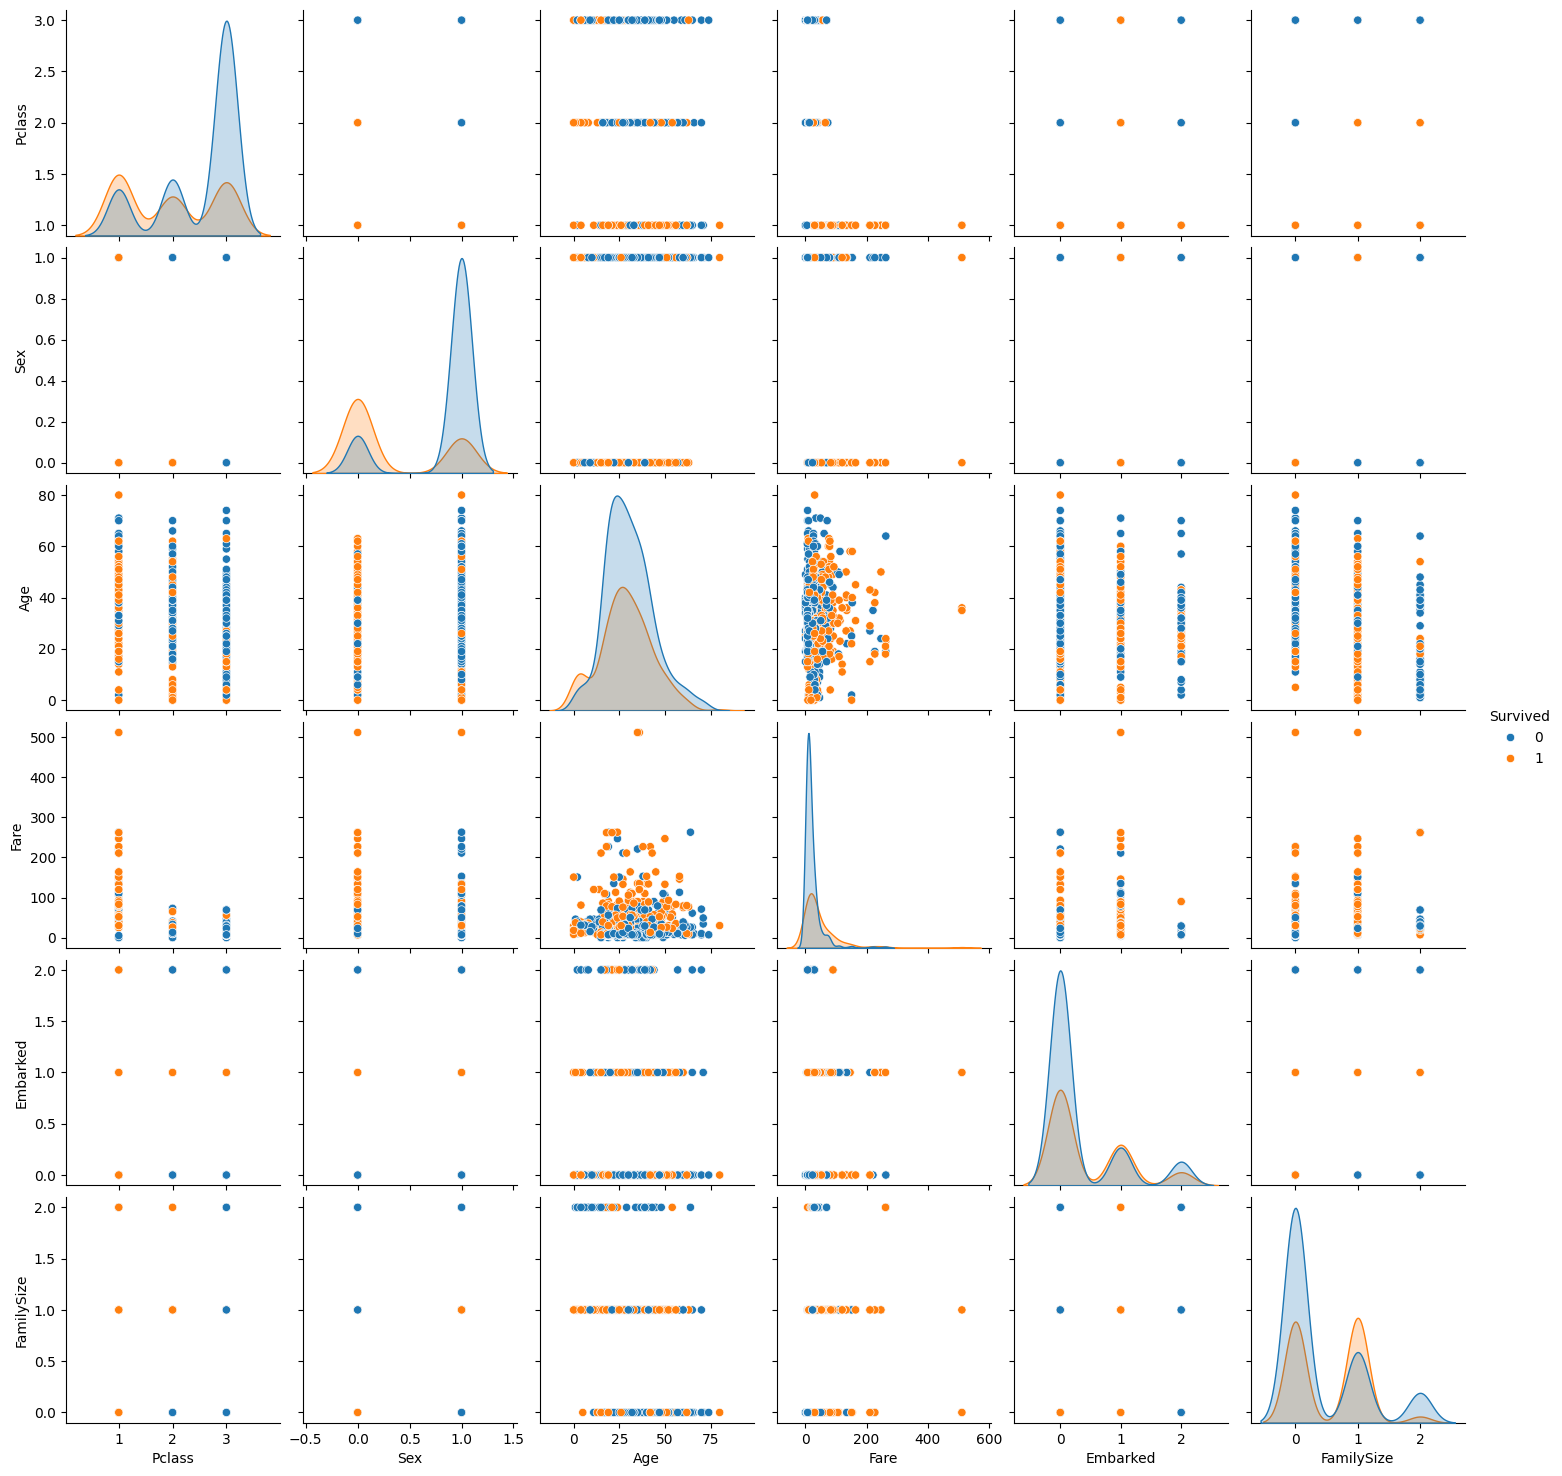

In [35]:
# Visualizing the data

sns.pairplot(train, hue='Survived')

Text(0.5, 1.0, 'Not Survived')

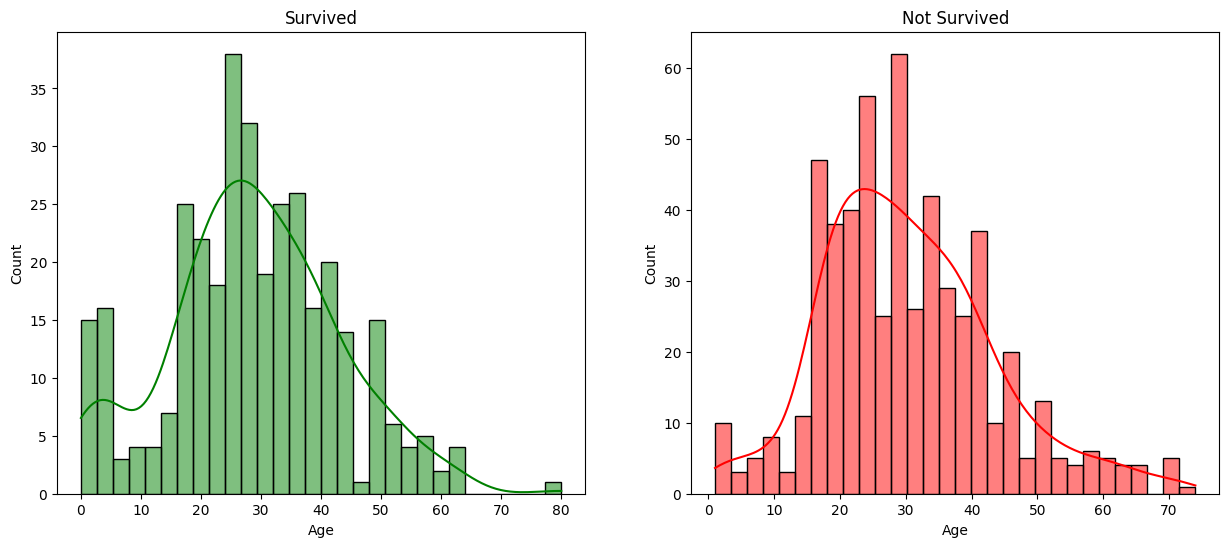

In [36]:
# Age distribution of the passengers

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(train[train['Survived'] == 1]['Age'], bins=30, kde=True, ax=ax[0], color='green')
ax[0].set_title('Survived')
sns.histplot(train[train['Survived'] == 0]['Age'], bins=30, kde=True, ax=ax[1], color='red')
ax[1].set_title('Not Survived')

Text(0.5, 1.0, 'Distribution of Family size by survival')

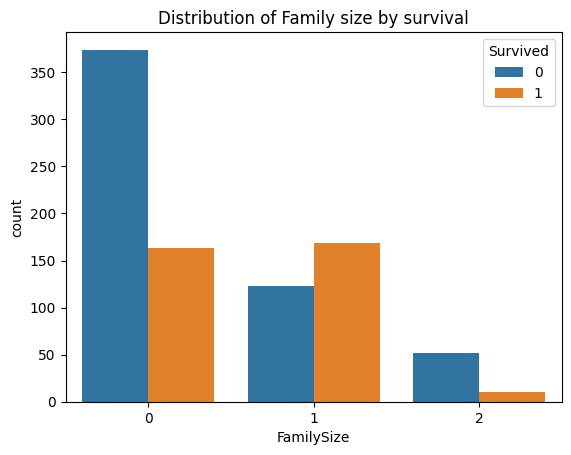

In [37]:
# Distribution of Family size by survival

sns.countplot(x='FamilySize', hue='Survived', data=train)
plt.title('Distribution of Family size by survival')

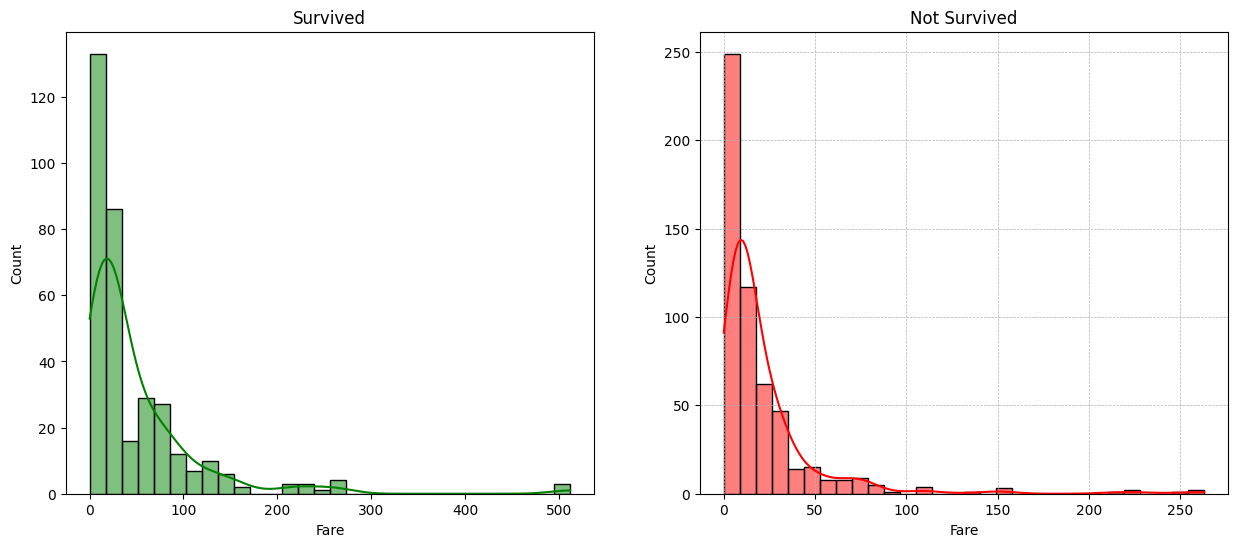

In [38]:
# Fare distribution by survival

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(train[train['Survived'] == 1]['Fare'], bins=30, kde=True, ax=ax[0], color='green')
ax[0].set_title('Survived')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.histplot(train[train['Survived'] == 0]['Fare'], bins=30, kde=True, ax=ax[1], color='red')
ax[1].set_title('Not Survived')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

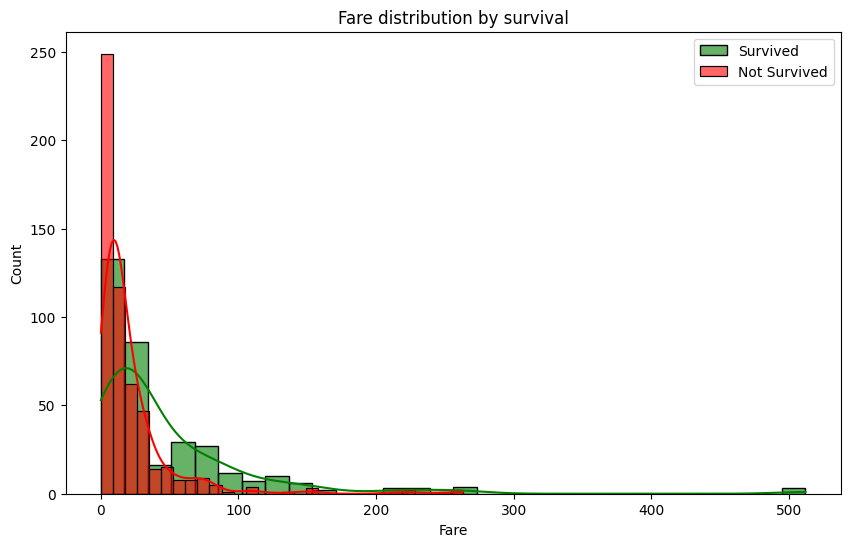

In [42]:
# Fare distribution by survival

plt.figure(figsize=(10, 6))
sns.histplot(train[train['Survived'] == 1]['Fare'], bins=30, kde=True, color='green', label='Survived', alpha=0.6)
sns.histplot(train[train['Survived'] == 0]['Fare'], bins=30, kde=True, color='red', label='Not Survived', alpha=0.6)
plt.title('Fare distribution by survival')
plt.legend()

Text(0.5, 1.0, 'Correlation matrix')

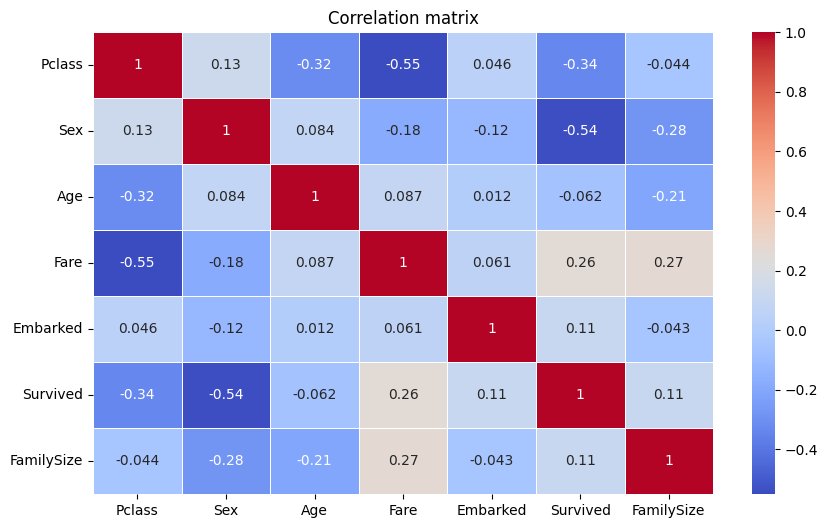

In [40]:
# Correlation matrix

plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')

<Axes: xlabel='Sex', ylabel='count'>

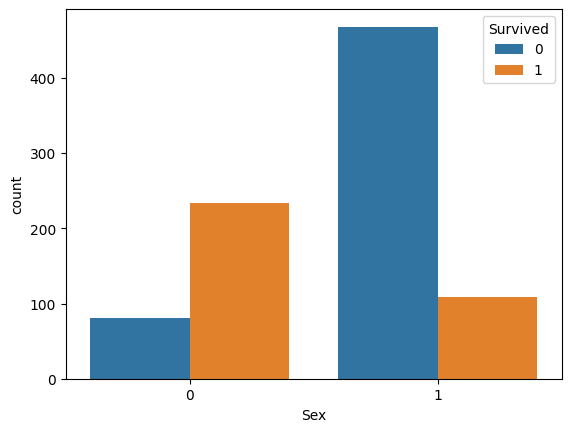

In [44]:
# Number of passengers survived by sex

sns.countplot(x = 'Sex', hue='Survived', data=train)

## Females survived more than males 🙂

<Axes: xlabel='Pclass', ylabel='count'>

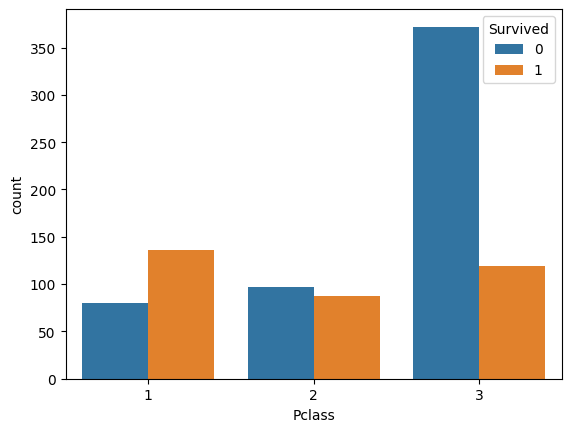

In [45]:
# Number of passengers survived by class

sns.countplot(x = 'Pclass', hue='Survived', data=train)

# <font face="Verdana" color="DarkSalmon"><b>Feature Engineering</b></font>

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_reports